In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# import dask.dataframe as dd
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
# data_path = '/home/rayandrew/Data/azure-data/vmtable.csv.gz'
data_path = '/home/rayandrew/Projects/anl-cl/raw_data/azure/vmcpu.parquet'
headers = ['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket']
# trace_dataframe = pd.read_csv(data_path, header=None, index_col=False, names=headers, delimiter=',')
trace_dataframe = pd.read_parquet(data_path, columns=headers, engine="fastparquet")
trace_dataframe = trace_dataframe.sort_values(by=["vmdeleted"]).reset_index(drop=True)
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket
0,VXGOFs+UvurxdZwbMKQFOAUGLLDEcuZ16Z571pEg5o4xGR...,2rFlT+eDM/S9WUUPK0dgsYUAvHJvOwz8SZxjVVJKVkx0yn...,Lg9BhCFTVdbetfgHm0SNVC3U1u1WQ02h6JY4Dc3B1EE6yW...,0,0,26.145941,9.610978,26.145941,Unknown,2,8
1,6AF4YRKyTypQQOjJTvDSk2/DJ23cBu1lQwXB7yxFb3sDOu...,5uVt5XpvI+xMxYgs34MfbcX9iITjsopZl7mptHxEbmxaB6...,WRIccg/h3Ud9wxPdnmOvhlFCkTcBgweVsJSZ0O6HYzQJj5...,0,0,0.356106,0.313852,0.356106,Unknown,2,4
2,xuK9OvM2tUJFgeJiOU5lahhzrbltInX6RP0htWMy6Ghkzg...,wA+NjFBhsKDx+8aBOS/6S1q0poOnhIjD8c8SswoR9isthg...,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/J6C+...,0,0,0.671804,0.539965,0.671804,Unknown,2,8
3,hi+BdsQ+vNouAUqov6IEwMzaZ4gtBRmT9SsP9Qa7ipXDM2...,T5YgbHHsKY6pX+pei3XcWWpIvtVWWkZQFnMYy4VtXV0riR...,/M/NNfrx6jUC97ev+QgMyH6DyFdCcAerLZg+z/Bhenbedn...,0,0,10.007839,7.462821,10.007839,Unknown,4,8
4,HwjVveebzWKml4zL33XIpEFgkLHi2nGAQQW56ZfthoJhUS...,ZWsJmK98wp0h+ICo8NVE0buqwmxwjrth9iPeJgNWJue90w...,6IPETzEOT+QfzrHJyebQ4+ai12EGm7qmwBC9R0z62oyzG1...,0,0,0.071183,0.037814,0.071183,Unknown,4,32


In [3]:
subscription_data_path= '~/Data/azure-data/subscriptions.csv.gz'
subscription_headers=['subscriptionid', 'vmcreated', 'vmcount']
subscription_trace_dataframe = pd.read_csv(subscription_data_path, header=None, index_col=False,names=subscription_headers,delimiter=',')
subscription_trace_dataframe.head()

,subscriptionid,vmcreated,vmcount
0,/YdjZT4MloSQErgc+pr6xPdxhPDK2DdCHz3v1uYvb+RQPb...,418200,2
1,1owRC8fAiTkftDDmemUYdXtzzmnuOoKN1keoqCE0SkllaU...,0,8947
2,1wYls1fw1ahqoRuYgqTwW1CWwFCA+GhM8bUdE2ZnE3QEUi...,0,6057
3,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,0,31
4,4JEvQIV0SLuz6P+rPxPQCIZTOsDW2Y9wUPPMwQxL4sJ0ob...,0,1


In [5]:
deployment_data_path = '~/Data/azure-data/deployments.csv.gz'
deployment_headers=['deploymentid','deploymentsize']
deployment_trace_dataframe = pd.read_csv(deployment_data_path, header=None, index_col=False,names=deployment_headers,delimiter=',')
deployment_trace_dataframe.head()

,deploymentid,deploymentsize
0,+EZ/AWPlMyGxKY9bSsXYV+nf3hgJLlR7kNJPNNJDerKjM3...,11
1,+ZraIDUNaWYDZMBiBtZm7xSjr+j3zcHGjup1+wyKxHF+kd...,9
2,/+3IQ9csEUWlX/OR5lHSiUh+EH54WfI9nfpjniqCk/cQig...,2
3,/5mEvsIGOul7DM6xGef5rE1u0TZg4N7dkSmotRO1D87M8i...,23
4,/DrUXkHMnF+IdCiFWiT06P/2CZBiZ7Y1WLfTZGV7hU868C...,11


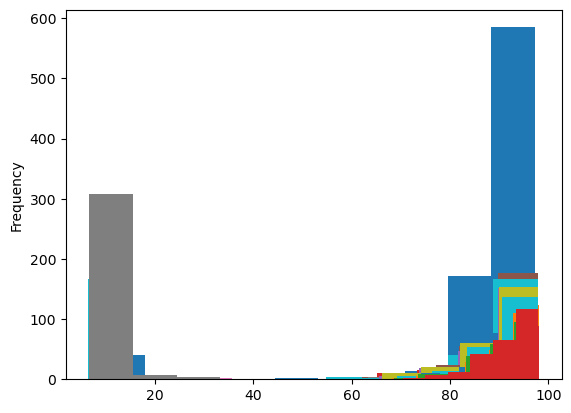

In [48]:
x = trace_dataframe[trace_dataframe.subscriptionid == subscription_trace_dataframe.iloc[2].subscriptionid].groupby(by=["deploymentid"])

count = 0
for group, group_data in x:
    group_data.p95maxcpu.plot.hist()
    # if count == 1:
    #     group_data.p95maxcpu.plot.hist()
    #     # display(group_data)
    #     break
    count += 1
# x.get_group(0), len(x)

In [28]:
len(trace_dataframe), len(subscription_trace_dataframe), len(deployment_trace_dataframe)

(2695548, 6687, 33205)

In [8]:
len(trace_dataframe.vmid.unique())

2695548

In [ ]:
trace_dataframe.head()

In [ ]:
# trace_dataframe = trace_dataframe[(trace_dataframe.vmcreated != 0) & (trace_dataframe.vmdeleted != 0)]
work_df = trace_dataframe.copy()
work_df.head()

In [ ]:
work_df.vmdeleted.unique()

In [ ]:
work_df.vmcreated.unique()

In [ ]:
work_df[work_df.vmcreated != work_df.vmdeleted].head()

In [ ]:
work_df["day"] = np.floor(work_df["vmdeleted"] / (60 * 60 * 24))
work_df['day'] = work_df['day'].astype('int')

In [ ]:
work_df["day"].unique()

In [ ]:
i = 0
for vmd, g in work_df.groupby(by=["vmdeleted"]):
    if i >= 5:
        break
    print(vmd, len(g))
    i+=1
    # display(g.head())
    # break

In [ ]:
i = 0
day_group = work_df.groupby(by=["day"])
for vmd, g in day_group:
    if i >= 1:
        break
    # print(vmd, len(g))
    # g.plot(y="p95maxcpu")
    # g.iloc[0:200].plot(y="p95maxcpu", figsize=(30, 4))
    # g.plot(y="p95maxcpu", figsize=(30, 4))
    i+=1

print(len(day_group.get_group(0)))
# day_group.get_group(1).reset_index(drop=True).iloc[400:600].plot(y="p95maxcpu", figsize=(30, 4))
day_group.get_group(0).reset_index(drop=True).iloc[1000:1500].plot(y="p95maxcpu", figsize=(30, 4))

day_group.get_group(0).reset_index(drop=True).iloc[1300:1800].plot(y="p95maxcpu", figsize=(30, 4))
# day_group.get_group(0).reset_index(drop=True).iloc[1500:2000].plot(y="p95maxcpu", figsize=(30, 4))


# print(len(day_group.get_group(1)))
# # day_group.get_group(1).reset_index(drop=True).iloc[400:600].plot(y="p95maxcpu", figsize=(30, 4))
# day_group.get_group(1).reset_index(drop=True).iloc[1000:1500].plot(y="p95maxcpu", figsize=(30, 4))

# print(len(day_group.get_group(2)))
# day_group.get_group(2).reset_index(drop=True).iloc[7000:7500].plot(y="p95maxcpu", figsize=(30, 4))

# print(len(day_group.get_group(3)))
# day_group.get_group(3).reset_index(drop=True).iloc[8000:8500].plot(y="p95maxcpu", figsize=(30, 4))
# day_group.get_group(3).reset_index(drop=True).iloc[8500:9000].plot(y="p95maxcpu", figsize=(30, 4))

# day_group.get_group(1).reset_index(drop=True).iloc[0:300].plot(y="p95maxcpu", figsize=(30, 4))

In [ ]:
np.floor(300/(60*60*24))

In [ ]:
trace_dataframe.iloc[0:200].plot(y="p95maxcpu", figsize=(30, 4))

In [ ]:
trace_dataframe.sort_values(by=["vmdeleted"]).reset_index(drop=True).iloc[0:400].plot(y="p95maxcpu", figsize=(30, 4))

In [ ]:
trace_dataframe[trace_dataframe["vmid"] == 'yNf/R3X8fyXkOJm3ihXQcT0F52a8cDWPPRzTT6QFW8N+1QPfeKR5//6xyX0VYn7X']

In [ ]:
len(trace_dataframe)

In [ ]:
# data_path = 
reading_headers = ['timestamp', 'vmid', 'mincpu', 'maxcpu', 'avgcpu']
# headers = ['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket']
df = pd.read_csv('/home/rayandrew/Data/azure-data/vm_cpu_readings-file-1-of-195.csv.gz', header=None, names=reading_headers, index_col=False, delimiter=',')

In [ ]:
df.head()

In [ ]:
df[df[1]== 'yNf/R3X8fyXkOJm3ihXQcT0F52a8cDWPPRzTT6QFW8N+1QPfeKR5//6xyX0VYn7X'][4]

In [ ]:
sns.ecdfplot(data=, y="4")

In [79]:
def feats_bucket_cpu_transform_test(df, target_name: str = "p95maxcpu", n_bins: int = 100):
    df = df.copy()
    temp_column = f"{target_name}_percent"
    df[temp_column] = df[target_name].apply(np.ceil)
    df = df.astype({temp_column: int})
    targets = np.array(df[temp_column].values).reshape(-1)
    ohe = np.eye(n_bins + 1)[targets].astype(int)
    percent_columns = [
        f"{temp_column}_{i}" for i in range(0, n_bins + 1)
    ]
    percent_df = pd.DataFrame(
        ohe,
        columns=percent_columns,
    )
    # pd.set_option('display.max_columns', 102) 
    # display(percent_df.head())
    # percent_df = pd.get_dummies(df.p95maxcpu_percent, prefix="percent", dtype=int)
    df = pd.concat([df, percent_df], axis=1)
    # df[percent_columns] = df.groupby(by=["subscriptionid"])[
    #     percent_columns
    # ].transform()
    df = df.drop(columns=[temp_column])
    df[percent_columns] = df.groupby(by=["subscriptionid"])[
        percent_columns
    ].transform(lambda d: d.shift(fill_value=False)).astype(bool)
    # df[percent_columns] = df[percent_columns].astype(bool)
    return df, percent_df, percent_columns

xx = trace_dataframe[trace_dataframe.subscriptionid == subscription_trace_dataframe.iloc[0].subscriptionid]
display(xx)
test_df = trace_dataframe.copy()
test_df, percent_df, percent_columns = feats_bucket_cpu_transform_test(test_df)
display(test_df[test_df.subscriptionid == subscription_trace_dataframe.iloc[0].subscriptionid])
post_test_df = test_df.copy()
post_test_df[percent_columns] = post_test_df.groupby(by=["subscriptionid"])[
    percent_columns
].transform(lambda d: d | d.shift()).astype(int)
pd.set_option('display.max_rows', 112)
pd.set_option('display.max_columns', 102)
post_test_df[post_test_df.subscriptionid == subscription_trace_dataframe.iloc[0].subscriptionid]

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket
875213,g79+vOfo6ZhBQy+spIo7WKEfXqIpv8yFq8wUmRrgZkcN9S...,/YdjZT4MloSQErgc+pr6xPdxhPDK2DdCHz3v1uYvb+RQPb...,UXdRO0At65huZ8oWmFO2a/Qw7dVy+Blth2joMYvJjiCeU9...,418200,921600,76.158392,0.761344,6.840349,Unknown,2,8
875238,AxmyZMJo29niyQcxlAUDJByM8y+jUmRewxi656dStEUTsa...,/YdjZT4MloSQErgc+pr6xPdxhPDK2DdCHz3v1uYvb+RQPb...,UXdRO0At65huZ8oWmFO2a/Qw7dVy+Blth2joMYvJjiCeU9...,421800,921600,80.413155,0.498401,3.435317,Unknown,2,8


,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,p95maxcpu_percent_0,p95maxcpu_percent_1,p95maxcpu_percent_2,p95maxcpu_percent_3,p95maxcpu_percent_4,p95maxcpu_percent_5,p95maxcpu_percent_6,p95maxcpu_percent_7,p95maxcpu_percent_8,p95maxcpu_percent_9,p95maxcpu_percent_10,p95maxcpu_percent_11,p95maxcpu_percent_12,p95maxcpu_percent_13,p95maxcpu_percent_14,p95maxcpu_percent_15,p95maxcpu_percent_16,p95maxcpu_percent_17,p95maxcpu_percent_18,p95maxcpu_percent_19,p95maxcpu_percent_20,p95maxcpu_percent_21,p95maxcpu_percent_22,p95maxcpu_percent_23,p95maxcpu_percent_24,p95maxcpu_percent_25,p95maxcpu_percent_26,p95maxcpu_percent_27,p95maxcpu_percent_28,p95maxcpu_percent_29,p95maxcpu_percent_30,p95maxcpu_percent_31,p95maxcpu_percent_32,p95maxcpu_percent_33,p95maxcpu_percent_34,p95maxcpu_percent_35,p95maxcpu_percent_36,p95maxcpu_percent_37,p95maxcpu_percent_38,p95maxcpu_percent_39,...,p95maxcpu_percent_50,p95maxcpu_percent_51,p95maxcpu_percent_52,p95maxcpu_percent_53,p95maxcpu_percent_54,p95maxcpu_percent_55,p95maxcpu_percent_56,p95maxcpu_percent_57,p95maxcpu_percent_58,p95maxcpu_percent_59,p95maxcpu_percent_60,p95maxcpu_percent_61,p95maxcpu_percent_62,p95maxcpu_percent_63,p95maxcpu_percent_64,p95maxcpu_percent_65,p95maxcpu_percent_66,p95maxcpu_percent_67,p95maxcpu_percent_68,p95maxcpu_percent_69,p95maxcpu_percent_70,p95maxcpu_percent_71,p95maxcpu_percent_72,p95maxcpu_percent_73,p95maxcpu_percent_74,p95maxcpu_percent_75,p95maxcpu_percent_76,p95maxcpu_percent_77,p95maxcpu_percent_78,p95maxcpu_percent_79,p95maxcpu_percent_80,p95maxcpu_percent_81,p95maxcpu_percent_82,p95maxcpu_percent_83,p95maxcpu_percent_84,p95maxcpu_percent_85,p95maxcpu_percent_86,p95maxcpu_percent_87,p95maxcpu_percent_88,p95maxcpu_percent_89,p95maxcpu_percent_90,p95maxcpu_percent_91,p95maxcpu_percent_92,p95maxcpu_percent_93,p95maxcpu_percent_94,p95maxcpu_percent_95,p95maxcpu_percent_96,p95maxcpu_percent_97,p95maxcpu_percent_98,p95maxcpu_percent_99,p95maxcpu_percent_100
875213,g79+vOfo6ZhBQy+spIo7WKEfXqIpv8yFq8wUmRrgZkcN9S...,/YdjZT4MloSQErgc+pr6xPdxhPDK2DdCHz3v1uYvb+RQPb...,UXdRO0At65huZ8oWmFO2a/Qw7dVy+Blth2joMYvJjiCeU9...,418200,921600,76.158392,0.761344,6.840349,Unknown,2,8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
875238,AxmyZMJo29niyQcxlAUDJByM8y+jUmRewxi656dStEUTsa...,/YdjZT4MloSQErgc+pr6xPdxhPDK2DdCHz3v1uYvb+RQPb...,UXdRO0At65huZ8oWmFO2a/Qw7dVy+Blth2joMYvJjiCeU9...,421800,921600,80.413155,0.498401,3.435317,Unknown,2,8,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,p95maxcpu_percent_0,p95maxcpu_percent_1,p95maxcpu_percent_2,p95maxcpu_percent_3,p95maxcpu_percent_4,p95maxcpu_percent_5,p95maxcpu_percent_6,p95maxcpu_percent_7,p95maxcpu_percent_8,p95maxcpu_percent_9,p95maxcpu_percent_10,p95maxcpu_percent_11,p95maxcpu_percent_12,p95maxcpu_percent_13,p95maxcpu_percent_14,p95maxcpu_percent_15,p95maxcpu_percent_16,p95maxcpu_percent_17,p95maxcpu_percent_18,p95maxcpu_percent_19,p95maxcpu_percent_20,p95maxcpu_percent_21,p95maxcpu_percent_22,p95maxcpu_percent_23,p95maxcpu_percent_24,p95maxcpu_percent_25,p95maxcpu_percent_26,p95maxcpu_percent_27,p95maxcpu_percent_28,p95maxcpu_percent_29,p95maxcpu_percent_30,p95maxcpu_percent_31,p95maxcpu_percent_32,p95maxcpu_percent_33,p95maxcpu_percent_34,p95maxcpu_percent_35,p95maxcpu_percent_36,p95maxcpu_percent_37,p95maxcpu_percent_38,p95maxcpu_percent_39,...,p95maxcpu_percent_50,p95maxcpu_percent_51,p95maxcpu_percent_52,p95maxcpu_percent_53,p95maxcpu_percent_54,p95maxcpu_percent_55,p95maxcpu_percent_56,p95maxcpu_percent_57,p95maxcpu_percent_58,p95maxcpu_percent_59,p95maxcpu_percent_60,p95maxcpu_percent_61,p95maxcpu_percent_62,p95maxcpu_percent_63,p95maxcpu_percent_64,p95maxcpu_percent_65,p95maxcpu_percent_66,p95maxcpu_percent_67,p95maxcpu_percent_68,p95maxcpu_percent_69,p95maxcpu_percent_70,p95maxcpu_percent_71,p95maxcpu_percent_72,p95maxcpu_percent_73,p95maxcpu_percent_74,p95maxcpu_percent_75,p95maxcpu_percent_76,p95maxcpu_percent_77,p95maxcpu_percent_78,p95maxcpu_percent_79,p95maxcpu_percent_80,p95maxcpu_percent_81,p95maxcpu_percent_82,p95maxcpu_percent_83,p95maxcpu_percent_84,p95maxcpu_percent_85,p95maxcpu_percent_86,p95maxcpu_percent_87,p95maxcpu_percent_88,p95maxcpu_percent_89,p95maxcpu_percent_90,p95maxcpu_percent_91,p95maxcpu_percent_92,p95maxcpu_percent_93,p95maxcpu_percent_94,p95maxcpu_percent_95,p95maxcpu_percent_96,p95maxcpu_percent_97,p95maxcpu_percent_98,p95maxcpu_percent_99,p95maxcpu_percent_100
875213,g79+vOfo6ZhBQy+spIo7WKEfXqIpv8yFq8wUmRrgZkcN9S...,/YdjZT4MloSQErgc+pr6xPdxhPDK2DdCHz3v1uYvb+RQPb...,UXdRO0At65huZ8oWmFO2a/Qw7dVy+Blth2joMYvJjiCeU9...,418200,921600,76.158392,0.761344,6.840349,Unknown,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
875238,AxmyZMJo29niyQcxlAUDJByM8y+jUmRewxi656dStEUTsa...,/YdjZT4MloSQErgc+pr6xPdxhPDK2DdCHz3v1uYvb+RQPb...,UXdRO0At65huZ8oWmFO2a/Qw7dVy+Blth2joMYvJjiCeU9...,421800,921600,80.413155,0.498401,3.435317,Unknown,2,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [152]:

# https://stackoverflow.com/a/61117770
def find_first(x):
    idx = x.view(bool).argmax() // x.itemsize
    return idx if x[idx] else -1

def custom_fn(d):
    shifted = d.shift(1, fill_value=0)
    first_idx = find_first(shifted.values == 1)
    if first_idx != -1:
        shifted.iloc[first_idx:] = 1
    return shifted

def feats_bucket_cpu_transform_v3(df, target_name: str = "p95maxcpu", n_bins: int = 100):
    df = df.copy()
    temp_column = f"{target_name}_percent"
    df[temp_column] = df[target_name].apply(np.ceil)
    df = df.astype({temp_column: int})
    targets = np.array(df[temp_column].values).reshape(-1)
    ohe = np.eye(n_bins + 1)[targets].astype(int)
    percent_columns = [
        f"{temp_column}_{i}" for i in range(0, n_bins + 1)
    ]
    percent_df = pd.DataFrame(
        ohe,
        columns=percent_columns,
    )
    df = pd.concat([df, percent_df], axis=1)
    df = df.drop(columns=[temp_column])
    # df[percent_columns] = df.groupby(by=["subscriptionid"])[
    #     percent_columns
    # ].transform(lambda d: d.shift(fill_value=False)).astype(bool)
    # df[percent_columns] = df.groupby(by=["subscriptionid"])[
    #     percent_columns
    # ].transform(lambda d: d | d.shift()).astype(int)
    df[percent_columns] = df.groupby(by=["subscriptionid"])[
        percent_columns
    ].transform(custom_fn)
    return df

test_df = trace_dataframe.copy()
test_df = feats_bucket_cpu_transform_v3(test_df)
test_df

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,p95maxcpu_percent_0,p95maxcpu_percent_1,p95maxcpu_percent_2,p95maxcpu_percent_3,p95maxcpu_percent_4,p95maxcpu_percent_5,p95maxcpu_percent_6,p95maxcpu_percent_7,p95maxcpu_percent_8,p95maxcpu_percent_9,p95maxcpu_percent_10,p95maxcpu_percent_11,p95maxcpu_percent_12,p95maxcpu_percent_13,p95maxcpu_percent_14,p95maxcpu_percent_15,p95maxcpu_percent_16,p95maxcpu_percent_17,p95maxcpu_percent_18,p95maxcpu_percent_19,p95maxcpu_percent_20,p95maxcpu_percent_21,p95maxcpu_percent_22,p95maxcpu_percent_23,p95maxcpu_percent_24,p95maxcpu_percent_25,p95maxcpu_percent_26,p95maxcpu_percent_27,p95maxcpu_percent_28,p95maxcpu_percent_29,p95maxcpu_percent_30,p95maxcpu_percent_31,p95maxcpu_percent_32,p95maxcpu_percent_33,p95maxcpu_percent_34,p95maxcpu_percent_35,p95maxcpu_percent_36,p95maxcpu_percent_37,p95maxcpu_percent_38,p95maxcpu_percent_39,...,p95maxcpu_percent_50,p95maxcpu_percent_51,p95maxcpu_percent_52,p95maxcpu_percent_53,p95maxcpu_percent_54,p95maxcpu_percent_55,p95maxcpu_percent_56,p95maxcpu_percent_57,p95maxcpu_percent_58,p95maxcpu_percent_59,p95maxcpu_percent_60,p95maxcpu_percent_61,p95maxcpu_percent_62,p95maxcpu_percent_63,p95maxcpu_percent_64,p95maxcpu_percent_65,p95maxcpu_percent_66,p95maxcpu_percent_67,p95maxcpu_percent_68,p95maxcpu_percent_69,p95maxcpu_percent_70,p95maxcpu_percent_71,p95maxcpu_percent_72,p95maxcpu_percent_73,p95maxcpu_percent_74,p95maxcpu_percent_75,p95maxcpu_percent_76,p95maxcpu_percent_77,p95maxcpu_percent_78,p95maxcpu_percent_79,p95maxcpu_percent_80,p95maxcpu_percent_81,p95maxcpu_percent_82,p95maxcpu_percent_83,p95maxcpu_percent_84,p95maxcpu_percent_85,p95maxcpu_percent_86,p95maxcpu_percent_87,p95maxcpu_percent_88,p95maxcpu_percent_89,p95maxcpu_percent_90,p95maxcpu_percent_91,p95maxcpu_percent_92,p95maxcpu_percent_93,p95maxcpu_percent_94,p95maxcpu_percent_95,p95maxcpu_percent_96,p95maxcpu_percent_97,p95maxcpu_percent_98,p95maxcpu_percent_99,p95maxcpu_percent_100
0,VXGOFs+UvurxdZwbMKQFOAUGLLDEcuZ16Z571pEg5o4xGR...,2rFlT+eDM/S9WUUPK0dgsYUAvHJvOwz8SZxjVVJKVkx0yn...,Lg9BhCFTVdbetfgHm0SNVC3U1u1WQ02h6JY4Dc3B1EE6yW...,0,0,26.145941,9.610978,26.145941,Unknown,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6AF4YRKyTypQQOjJTvDSk2/DJ23cBu1lQwXB7yxFb3sDOu...,5uVt5XpvI+xMxYgs34MfbcX9iITjsopZl7mptHxEbmxaB6...,WRIccg/h3Ud9wxPdnmOvhlFCkTcBgweVsJSZ0O6HYzQJj5...,0,0,0.356106,0.313852,0.356106,Unknown,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,xuK9OvM2tUJFgeJiOU5lahhzrbltInX6RP0htWMy6Ghkzg...,wA+NjFBhsKDx+8aBOS/6S1q0poOnhIjD8c8SswoR9isthg...,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/J6C+...,0,0,0.671804,0.539965,0.671804,Unknown,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,hi+BdsQ+vNouAUqov6IEwMzaZ4gtBRmT9SsP9Qa7ipXDM2...,T5YgbHHsKY6pX+pei3XcWWpIvtVWWkZQFnMYy4VtXV0riR...,/M/NNfrx6jUC97ev+QgMyH6DyFdCcAerLZg+z/Bhenbedn...,0,0,10.007839,7.462821,10.007839,Unknown,4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HwjVveebzWKml4zL33XIpEFgkLHi2nGAQQW56ZfthoJhUS...,ZWsJmK98wp0h+ICo8NVE0buqwmxwjrth9iPeJgNWJue90w...,6IPETzEOT+QfzrHJyebQ4+ai12EGm7qmwBC9R0z62oyzG1...,0,0,0.071183,0.037814,0.071183,Unknown,4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [153]:
INDEX=3
xx = trace_dataframe[trace_dataframe.subscriptionid == subscription_trace_dataframe.iloc[INDEX].subscriptionid]
display(xx)
pd.set_option('display.max_rows', 112)
pd.set_option('display.max_columns', 102)
test_df[test_df.subscriptionid == subscription_trace_dataframe.iloc[INDEX].subscriptionid]

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket
1502139,8m4QazRWZgvhdOSrf/YZNpzxYqTKdbE6R1YeH9+T6y8haA...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,1569000,98.168688,8.338890,18.587462,Delay-insensitive,2,2
1558726,i7+MqulCxyUsHU1Bqil2OOJsvm58Vf2CUulT1pPi8Kq5Pt...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,1632900,97.518796,9.022121,20.474903,Delay-insensitive,2,2
1902711,C01w7Y1l1Sy8uCLvA2kqTTUxWbJu+oYwK8uVFlvvAmzDO2...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRbMvO...,1949400,1996800,36.879002,2.935695,11.638858,Unknown,4,8
1902819,ksjVeSKAa9mAGO3y5t1q3C6l4mK5FW+nIfLb2BFKFanaXp...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRbMvO...,1948800,1996800,75.855663,3.483123,11.619028,Unknown,4,8
2150295,b46TZfeArffHezw9hofWn+KkZ+IgogZyWujkXAqwRafgP2...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRbMvO...,1926600,2268000,97.728733,8.413250,20.532530,Unknown,2,2
2475649,67pCTATtprCrXRZ9BHvPZXSYje0ldjzMtJslkTDI2qzfpf...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,2591400,98.273699,10.843616,18.448286,Interactive,2,4
2478291,y62plcMkn8yQt8rkpqXI0f/GzVgTBMnZhu668n3EhlN8/Q...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,2591400,97.982331,10.840718,18.416305,Interactive,2,4
2479040,uZul/JY72M1dHU+Xm45/d6XNHGQUPaTnokO0MXx/UlWqnk...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,2591400,99.181446,9.779075,18.312184,Delay-insensitive,2,2
2491482,l2UShFmdc466Lb3msjr+y8chxN6/mzcUY3c08PLoMlxmxM...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,2591400,99.232770,9.272652,18.888641,Delay-insensitive,2,2
2502994,8PsI1dOPXkaoe0Hfi3V6UPBP2QpbzvcK4IfRRkoHHlznyL...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,2591400,94.468117,17.145544,44.531050,Delay-insensitive,2,4


,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,p95maxcpu_percent_0,p95maxcpu_percent_1,p95maxcpu_percent_2,p95maxcpu_percent_3,p95maxcpu_percent_4,p95maxcpu_percent_5,p95maxcpu_percent_6,p95maxcpu_percent_7,p95maxcpu_percent_8,p95maxcpu_percent_9,p95maxcpu_percent_10,p95maxcpu_percent_11,p95maxcpu_percent_12,p95maxcpu_percent_13,p95maxcpu_percent_14,p95maxcpu_percent_15,p95maxcpu_percent_16,p95maxcpu_percent_17,p95maxcpu_percent_18,p95maxcpu_percent_19,p95maxcpu_percent_20,p95maxcpu_percent_21,p95maxcpu_percent_22,p95maxcpu_percent_23,p95maxcpu_percent_24,p95maxcpu_percent_25,p95maxcpu_percent_26,p95maxcpu_percent_27,p95maxcpu_percent_28,p95maxcpu_percent_29,p95maxcpu_percent_30,p95maxcpu_percent_31,p95maxcpu_percent_32,p95maxcpu_percent_33,p95maxcpu_percent_34,p95maxcpu_percent_35,p95maxcpu_percent_36,p95maxcpu_percent_37,p95maxcpu_percent_38,p95maxcpu_percent_39,...,p95maxcpu_percent_50,p95maxcpu_percent_51,p95maxcpu_percent_52,p95maxcpu_percent_53,p95maxcpu_percent_54,p95maxcpu_percent_55,p95maxcpu_percent_56,p95maxcpu_percent_57,p95maxcpu_percent_58,p95maxcpu_percent_59,p95maxcpu_percent_60,p95maxcpu_percent_61,p95maxcpu_percent_62,p95maxcpu_percent_63,p95maxcpu_percent_64,p95maxcpu_percent_65,p95maxcpu_percent_66,p95maxcpu_percent_67,p95maxcpu_percent_68,p95maxcpu_percent_69,p95maxcpu_percent_70,p95maxcpu_percent_71,p95maxcpu_percent_72,p95maxcpu_percent_73,p95maxcpu_percent_74,p95maxcpu_percent_75,p95maxcpu_percent_76,p95maxcpu_percent_77,p95maxcpu_percent_78,p95maxcpu_percent_79,p95maxcpu_percent_80,p95maxcpu_percent_81,p95maxcpu_percent_82,p95maxcpu_percent_83,p95maxcpu_percent_84,p95maxcpu_percent_85,p95maxcpu_percent_86,p95maxcpu_percent_87,p95maxcpu_percent_88,p95maxcpu_percent_89,p95maxcpu_percent_90,p95maxcpu_percent_91,p95maxcpu_percent_92,p95maxcpu_percent_93,p95maxcpu_percent_94,p95maxcpu_percent_95,p95maxcpu_percent_96,p95maxcpu_percent_97,p95maxcpu_percent_98,p95maxcpu_percent_99,p95maxcpu_percent_100
1502139,8m4QazRWZgvhdOSrf/YZNpzxYqTKdbE6R1YeH9+T6y8haA...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,1569000,98.168688,8.338890,18.587462,Delay-insensitive,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1558726,i7+MqulCxyUsHU1Bqil2OOJsvm58Vf2CUulT1pPi8Kq5Pt...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRZmSF...,0,1632900,97.518796,9.022121,20.474903,Delay-insensitive,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1902711,C01w7Y1l1Sy8uCLvA2kqTTUxWbJu+oYwK8uVFlvvAmzDO2...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRbMvO...,1949400,1996800,36.879002,2.935695,11.638858,Unknown,4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1902819,ksjVeSKAa9mAGO3y5t1q3C6l4mK5FW+nIfLb2BFKFanaXp...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRbMvO...,1948800,1996800,75.855663,3.483123,11.619028,Unknown,4,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2150295,b46TZfeArffHezw9hofWn+KkZ+IgogZyWujkXAqwRafgP2...,37GxzuLNVu9neuiSXk/RMGqW2vCOIkF0aSGdIdR5QaMqSj...,ljiggarTa9lREBkmtLhdeJMc5M36Zk/gI3A/ZjXiaRbMvO...,1926600,2268000,97.728733,8.413250,20.532530,Unknown,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [154]:
# target_name = "p95maxcpu"
# n_bins = 100
# df_temp = trace_dataframe[trace_dataframe.subscriptionid == subscription_trace_dataframe.iloc[INDEX].subscriptionid].copy().reset_index(drop=True)
# temp_column = f"{target_name}_percent"
# df_temp[temp_column] = df_temp[target_name].apply(np.ceil)
# df_temp = df_temp.astype({temp_column: int})
# targets = np.array(df_temp[temp_column].values).reshape(-1)
# ohe = np.eye(n_bins + 1)[targets].astype(int)
# percent_columns = [
#     f"{temp_column}_{i}" for i in range(0, n_bins + 1)
# ]
# percent_df = pd.DataFrame(
#     ohe,
#     columns=percent_columns,
# )
# # display(percent_df)
# df_temp = pd.concat([df_temp, percent_df], axis=1)
# df_temp = df_temp.drop(columns=[temp_column])
# percent_temp_columns_ = [
#     f"{temp_column}_{i}_temp" for i in range(0, n_bins + 1)
# ]
# # df_temp[percent_columns] = df_temp[percent_columns].astype(bool).transform(lambda d: d.shift(fill_value=0)).astype(int)
# # df_temp[percent_columns] = df_temp[percent_columns].astype(bool).transform(lambda d: np.logical_or(d, d.shift(fill_value=0))).astype(int)
# # df_temp[percent_columns] = df_temp[percent_columns].astype(bool).transform(lambda d: d | d.shift(fill_value=0)).astype(int)
# # df_temp[percent_columns] = df_temp.groupby(by=["subscriptionid"])[
# #     percent_columns
# # ].transform(lambda d: d.shift(fill_value=False)).astype(bool)
# # df_temp[percent_columns] = df_temp.groupby(by=["subscriptionid"])[
# #     percent_columns
# # ].transform(lambda d: d | d.shift()).astype(int)

# # print(percent_columns)

# # https://stackoverflow.com/a/61117770
# def find_first(x):
#     idx = x.view(bool).argmax() // x.itemsize
#     return idx if x[idx] else -1

# def custom_fn(d):
#     shifted = d.shift(1, fill_value=False)
#     first_idx = find_first(shifted.values == True)
#     if first_idx != -1:
#         shifted.iloc[first_idx:] = True
#     return shifted

# pd.set_option('display.max_rows', 112)
# pd.set_option('display.max_columns', 232)
# # df_temp
# # display(df_temp[target_name])
# # x = df_temp[percent_columns].astype(bool).transform(lambda d: d.shift(fill_value=0))
# df_temp[percent_columns] = df_temp[percent_columns].astype(bool).transform(lambda d: custom_fn(d)).astype(int)
# df_temp
# # x[percent_columns]
# # display(df_temp[percent_columns[18]].astype(bool))
# # display(df_temp[percent_columns[18]].astype(bool).transform(lambda d: custom_fn(d)))

In [142]:

# def find_first(x):
#     idx = x.view(bool).argmax() // x.itemsize
#     return idx if x[idx] else -1
# test_array = np.array([True, False])
# find_first(test_array==True)

0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split